<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1226931/1764438210.py:30: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f"$\sigma={noise:.3f}$\ndbcv1={score1:.3f}\ndbcv2={score2:.3f}")


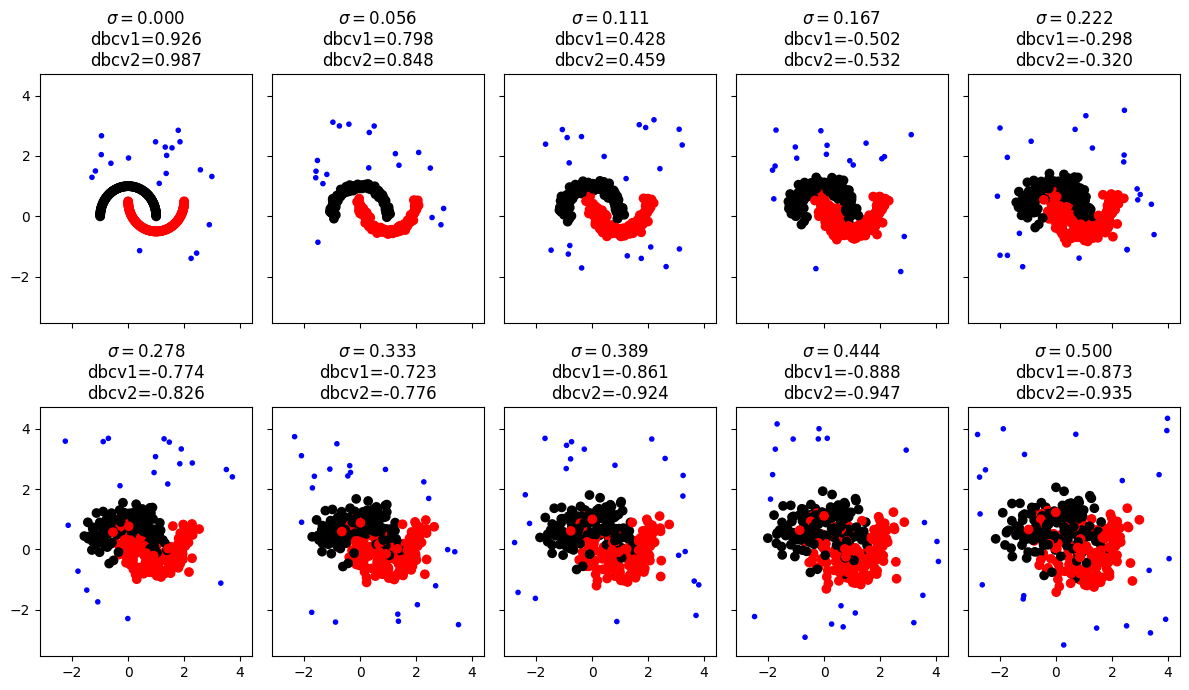

In [ ]:
import matplotlib.pyplot as plt
import sklearn.neighbors
import sklearn.datasets
import numpy as np
import dbcv

fig, axes = plt.subplots(2, 5, figsize=(12, 7), sharex=True, sharey=True, layout="tight")
colors = ["black", "red", "blue"]
rng = np.random.RandomState(182)

for i, noise in enumerate(np.linspace(0, 0.50, 10)):
    X, y = sklearn.datasets.make_moons(
        n_samples=300, noise=noise, random_state=1782
    )

    X_noise = rng.uniform(*(1.50 * np.quantile(X, (0, 1))), size=(30, 2))
    y_noise = np.asarray([-1] * len(X_noise), dtype=int)

    dists, _ = (sklearn.neighbors.NearestNeighbors(n_neighbors=1).fit(X).kneighbors(X_noise))
    dists = dists.squeeze()
    is_farther_away = dists > 0.5
    X_noise = X_noise[is_farther_away, :]
    y_noise = y_noise[is_farther_away]

    score1 = dbcv.dbcv(np.vstack((X, X_noise)), np.hstack((y, y_noise)))
    score2 = dbcv.dbcv(X, y)
    ax = axes[i // 5][i % 5]
    ax.scatter(*X.T, c=[colors[yi] for yi in y])
    ax.scatter(*X_noise.T, c=[colors[yi] for yi in y_noise], marker=".")
    ax.set_title(f"$\sigma={noise:.3f}$\ndbcv1={score1:.3f}\ndbcv2={score2:.3f}")

plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1226931/2467454787.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f"$\sigma={noise:.3f}$\ndbcv1={score1:.3f}\ndbcv2={score2:.3f}")


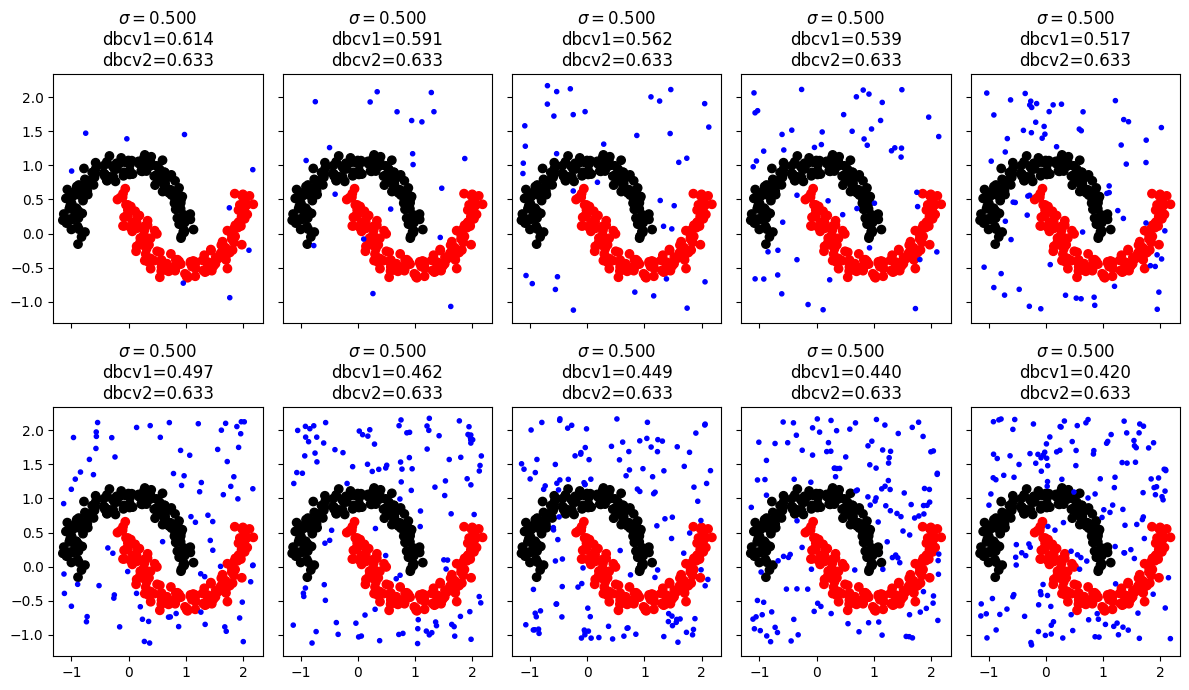

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 7), sharex=True, sharey=True, layout="tight")
colors = ["black", "red", "blue"]
rng = np.random.RandomState(182)

for i, sizei in enumerate(np.linspace(10, 200, 10)):
    X, y = sklearn.datasets.make_moons(
        n_samples=300, noise=0.1, random_state=1782
    )

    X_noise = rng.uniform(*(np.quantile(X, (0, 1))), size=(int(sizei), 2))
    y_noise = np.asarray([-1] * len(X_noise), dtype=int)

    dists, _ = (sklearn.neighbors.NearestNeighbors(n_neighbors=1).fit(X).kneighbors(X_noise))
    dists = dists.squeeze()
    is_farther_away = dists > 0.1
    X_noise = X_noise[is_farther_away, :]
    y_noise = y_noise[is_farther_away]

    score1 = dbcv.dbcv(np.vstack((X, X_noise)), np.hstack((y, y_noise)))
    score2 = dbcv.dbcv(X, y)
    ax = axes[i // 5][i % 5]
    ax.scatter(*X.T, c=[colors[yi] for yi in y])
    ax.scatter(*X_noise.T, c=[colors[yi] for yi in y_noise], marker=".")
    ax.set_title(f"$\sigma={noise:.3f}$\ndbcv1={score1:.3f}\ndbcv2={score2:.3f}")

plt.show()